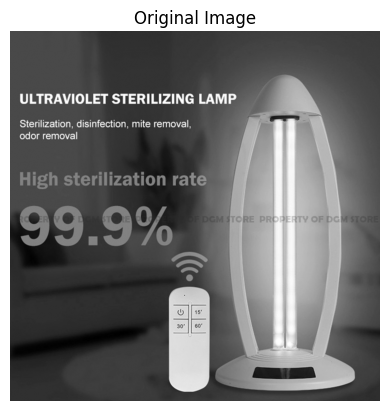

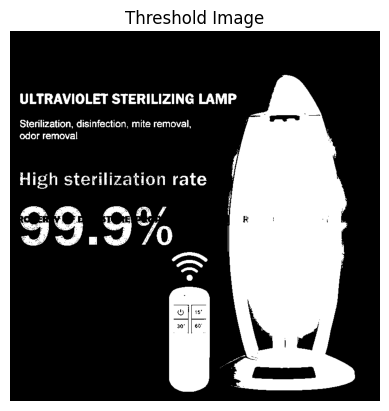

In [ ]:
# 1. Thresholding
# Intuition: Thresholding turns a grayscale image into pure black and white.
# "Everything brighter than this line stays. Everything darker disappears."

import cv2
import matplotlib.pyplot as plt

# convert to grayscale first
img = cv2.imread('dataset/img/light.jpg', 0)

# comparing each pixel to a set value, effectively converting a grayscale image into a binary one
# cv2.threshold(src, thresh_value, max_value, type)
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

if ret:
    cv2.imshow("Gray Scale Image", img)
    
# 1. Display with the gray colormap in plt lib
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off') # Hide axes
plt.show()

plt.imshow(thresh, cmap='gray')
plt.title("Threshold Image")
plt.axis('off') # Hide axes
plt.show()

# 2. Display with cv2 lib
cv2.imshow("Threshold Image", thresh)

cv2.waitKey(0)
cv2.destroyAllWindows()

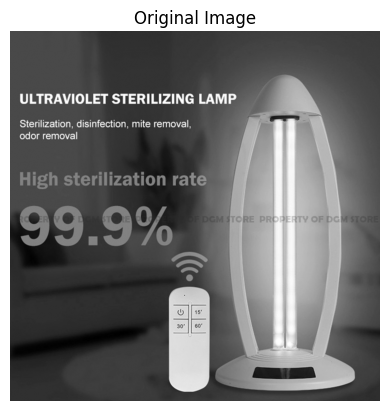

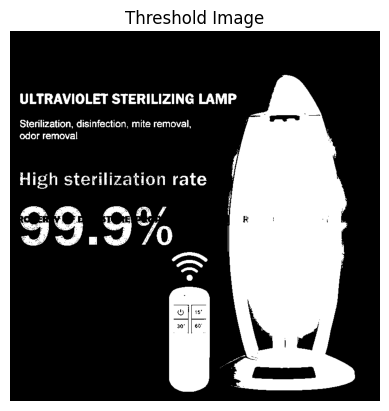

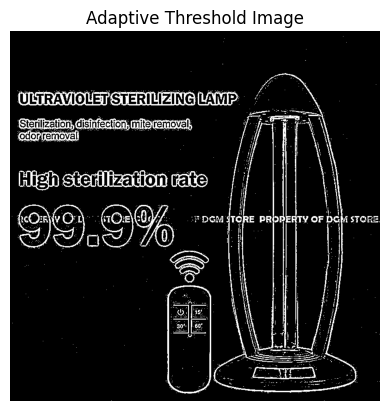

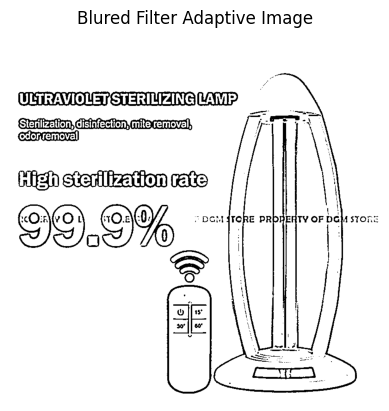

In [ ]:
# 2. Adaptive Threshold : Works when lighting is uneven.
# USES: Keeps the original thickness, Resistance to noise, Adaptive Threshold creates a "Mask" (white object, black background) that you can use to "color" or "cut" the object out of the original photo.

import cv2

# 1. Read the image in grayscale (using 0 as requested)
img = cv2.imread("dataset/img/light.jpg", 0)

if img is None:
    print("Error: Could not load image.")
else:
    # 2. Optional: Blur the image to reduce high-frequency noise
    # This leads to a cleaner threshold result
    blurred = cv2.GaussianBlur(img, (5, 5), 0)


    # 3. Apply Adaptive Gaussian Threshold
    # Adjusts threshold for local 9x9 neighborhoods
    adaptive_thresh = cv2.adaptiveThreshold(
        img, 
        255, 
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        cv2.THRESH_BINARY_INV, 
        9, 
        3
    )

    blurred_img_adaptive_thresh = cv2.adaptiveThreshold(
        blurred, 
        255, 
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        cv2.THRESH_BINARY, 
        9, 
        3
    )
    # 5. Display the results
    cv2.imshow("Original (Grayscale)", img)
    cv2.imshow("Adaptive Gaussian", adaptive_thresh)
    cv2.imshow("BLured Image Adaptive Gaussian", blurred_img_adaptive_thresh)
    
    plt.imshow(img, cmap='gray')
    plt.title("Original Image")
    plt.axis('off') # Hide axes
    plt.show()

    plt.imshow(adaptive_thresh, cmap='gray')
    plt.title("Adaptive Threshold Image")
    plt.axis('off') # Hide axes
    plt.show()

    plt.imshow(blurred_img_adaptive_thresh, cmap='gray')
    plt.title("Blured Filter Adaptive Image")
    plt.axis('off') # Hide axes
    plt.show()
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()



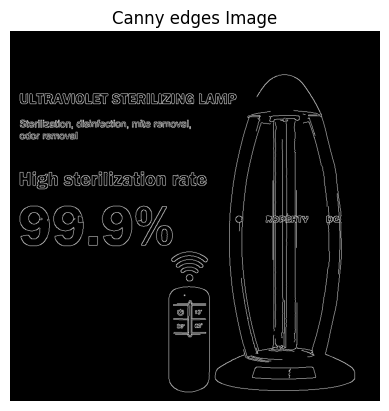

In [ ]:
# 3. Edge Detection
# Edges describes: Boundaries, Shapes, Structure
# The Logic of "Signal" vs. "Noise"
# In a binary image, 0 (Black) represents the absence of information (the background), while 1 or 255 (White) represents the presence of a feature. 
# Since an edge is the "feature" you are looking for, it is assigned the value of 255 to signify that a signal was detected at that pixel OpenCV Dev Docs.

# You should only use Canny when you specifically need to find geometry:
# a. Detecting the exact lanes on a road.
# b. Finding the circular rim of a coin.
# c. Alignment and rotation correction.

import cv2

img = cv2.imread("dataset/img/light.jpg", 0)
edges = cv2.Canny(img, 50, 200)

cv2.imshow("Edges", edges)

plt.imshow(edges, cmap='gray')
plt.title("Canny edges Image")
plt.axis('off') # Hide axes
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

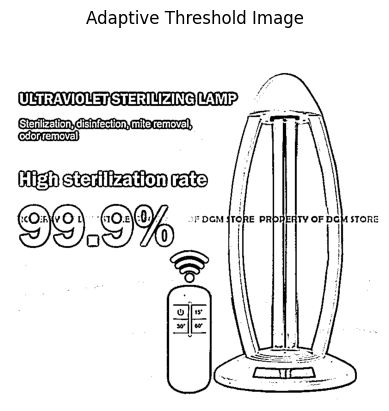

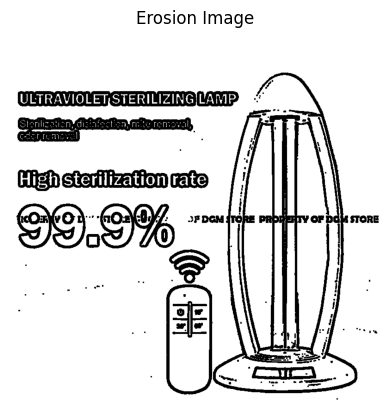

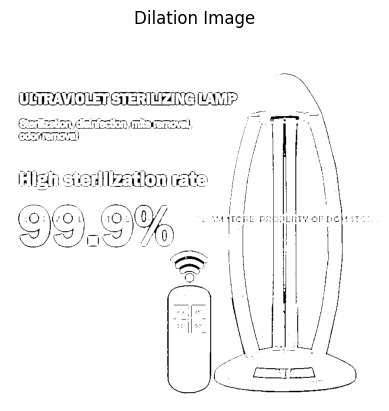

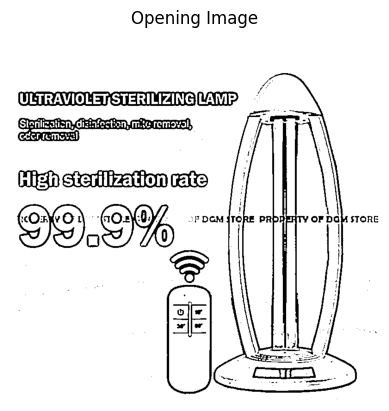

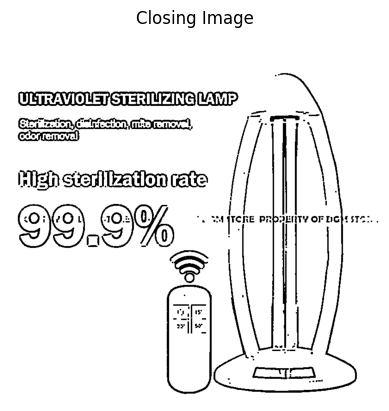

In [ ]:
# 3. Morphology (Shape Cleaning)
# Intuition: Morphology is about fixing the shape and structure of objects in an image
# Imagine pixels behaving like clay: Expand, Shrink, Close holes, Remove specks
# It is almost always used on Binary Images (Black and White) after you have detected edges or used a threshold, but before you start counting or identifying objects.

import cv2
import numpy as np

# convert to grayscale first
img = cv2.imread('dataset/img/light.jpg', 0)

blurred = cv2.GaussianBlur(img,(5,5),0)

# Apply Adaptive Gaussian Threshold
# Adjusts threshold for local 9x9 neighborhoods
adaptive_thresh = cv2.adaptiveThreshold(
        blurred, 
        255, 
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        cv2.THRESH_BINARY, 
        9, 
        2
)

# Morphology need a kernel, a small matrix
kernel = np.ones((3,3), np.uint8)

# Erosion( shrink white areas): Used to: Remove noise, Separate objects
erosion = cv2.erode(adaptive_thresh, kernel, iterations=1)

# Dilation (Expand White Areas): Used to: Fill gaps, Strengthen shapes
dilation = cv2.dilate(adaptive_thresh, kernel, iterations=1)

# Opening (Noise Removal): Erosion → Dilation
# Erosion deletes the dust and shrinks the rice. Dilation then grows the rice back to its original size, but the dust is already gone forever.
opening = cv2.morphologyEx(adaptive_thresh, cv2.MORPH_OPEN, kernel)

# Closing (Fill Holes): Dilation → Erosion
# Dilation fills the cracks and makes the circle thicker. Erosion then thins the circle back to normal, but the cracks stay filled.
closing = cv2.morphologyEx(adaptive_thresh, cv2.MORPH_CLOSE, kernel)



cv2.imshow("Adaptive Threshold Image", adaptive_thresh)
cv2.imshow("Erosion Image", erosion)
cv2.imshow("Dilation Image", dilation)
cv2.imshow("Opening Image", opening)
cv2.imshow("Closing Image", closing)

plt.imshow(adaptive_thresh, cmap='gray')
plt.title("Adaptive Threshold Image")
plt.axis('off') # Hide axes
plt.show()

plt.imshow(erosion, cmap='gray')
plt.title("Erosion Image")
plt.axis('off') # Hide axes
plt.show()

plt.imshow(dilation, cmap='gray')
plt.title("Dilation Image")
plt.axis('off') # Hide axes
plt.show()

plt.imshow(opening, cmap='gray')
plt.title("Opening Image")
plt.axis('off') # Hide axes
plt.show()

plt.imshow(closing, cmap='gray')
plt.title("Closing Image")
plt.axis('off') # Hide axes
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()



In [ ]:
# Noise looks like: Salt-and-pepper dots, Grain, Random specks
# Blurring removes noise.

import cv2

gray = cv2.imread("dataset/img/light.jpg", 0)

# Gaussian Blur: Smooths image softly.
blur = cv2.GaussianBlur(gray, (5,5), 0)

# Median Blur (Best for Salt Noise): Used in: Surveillance, Medical imaging
median = cv2.medianBlur(gray, 5)

# Bilateral Filter (Advanced): Preserves edges while smoothing.
bilateral = cv2.bilateralFilter(gray, 9, 75, 75)

cv2.imshow("Gray", gray)
cv2.imshow("Blur", blur)
cv2.imshow("Median", median)
cv2.imshow("Bilateral", bilateral)

cv2.waitKey(0)
cv2.destroyAllWindows()


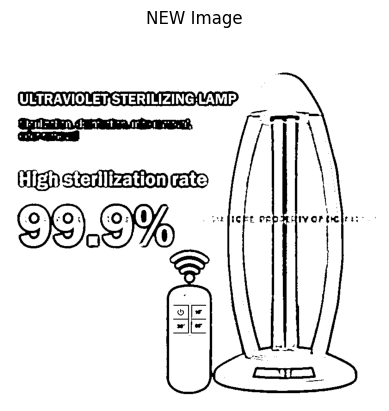

In [ ]:
import cv2
import numpy as np

gray = cv2.imread("dataset/img/light.jpg", 0)

# Gaussian Blur: Smooths image softly.
blur = cv2.GaussianBlur(gray, (5,5), 0)

# Median Blur (Best for Salt Noise): Used in: Surveillance, Medical imaging
median = cv2.medianBlur(gray, 5)

# Bilateral Filter (Advanced): Preserves edges while smoothing.
bilateral = cv2.bilateralFilter(gray, 9, 75, 75)

# Adaptive Threshold for ligthing photos
adap = cv2.adaptiveThreshold(
    bilateral,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    9, 
    2
)

# Morphology need a kernel, a small matrix
kernel = np.ones((3,3), np.uint8)

# Opening (Noise Removal): Erosion → Dilation
opening = cv2.morphologyEx(adap, cv2.MORPH_OPEN, kernel)

plt.imshow(opening, cmap='gray')
plt.title("Bilateral Blur Image")
plt.axis('off') # Hide axes
plt.show()

cv2.imshow("Bileteral Blur Image", opening)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
# Otsu’s Threshold (Automatic Threshold Selection)
# Intuition: Instead of you guessing a threshold like 127, Otsu lets the computer analyze the histogram and choose the best separation point.
# It works best when the image has two clear regions: foreground and background.

import cv2

img = cv2.imread("dataset/img/light.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, otsu = cv2.threshold(gray, 0, 255,
                        cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2.imshow("Otsu", otsu)
cv2.waitKey(0)
cv2.destroyAllWindows()


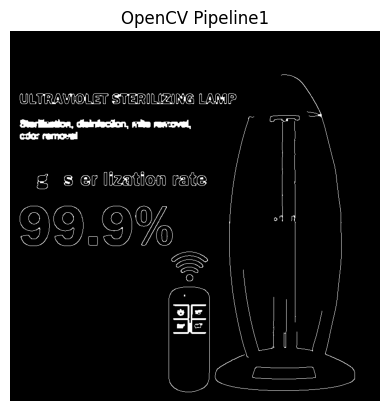

In [ ]:
# Pipeline:
# Gray → Blur → Edge → Morphology
# This exact flow appears in: Lane detection, Shape detection, Industrial inspection

import cv2
import numpy as np

img = cv2.imread("dataset/img/light.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (5,5), 0)

edges = cv2.Canny(blur, 100, 200)

kernel = np.ones((3,3), np.uint8)
clean = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

plt.imshow(clean, cmap='gray')
plt.title("OpenCV Pipeline1")
plt.axis('off') # Hide axes
plt.show()

cv2.imshow("Original", img)
cv2.imshow("Edges", edges)
cv2.imshow("Cleaned", clean)

cv2.waitKey(0)
cv2.destroyAllWindows()



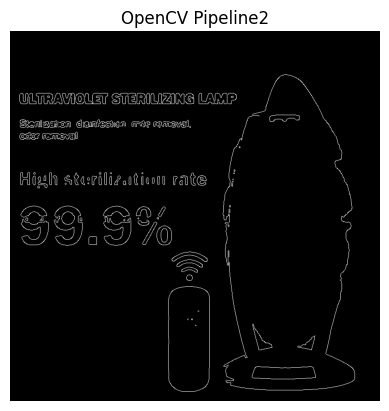

In [ ]:
# Opencv Pipeline
# Gray → Threshold → Morphology → Edge
import cv2

img = cv2.imread("dataset/img/light.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray,(5,5),0)
thresh = cv2.threshold(blur,0,255,
                       cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

kernel = np.ones((3,3), np.uint8)
clean = cv2.morphologyEx(thresh,
                         cv2.MORPH_OPEN,
                         kernel)
edges = cv2.Canny(clean,50,150)

plt.imshow(edges, cmap='gray')
plt.title("OpenCV Pipeline2")
plt.axis('off') # Hide axes
plt.show()

cv2.imshow("Pipeline2", edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

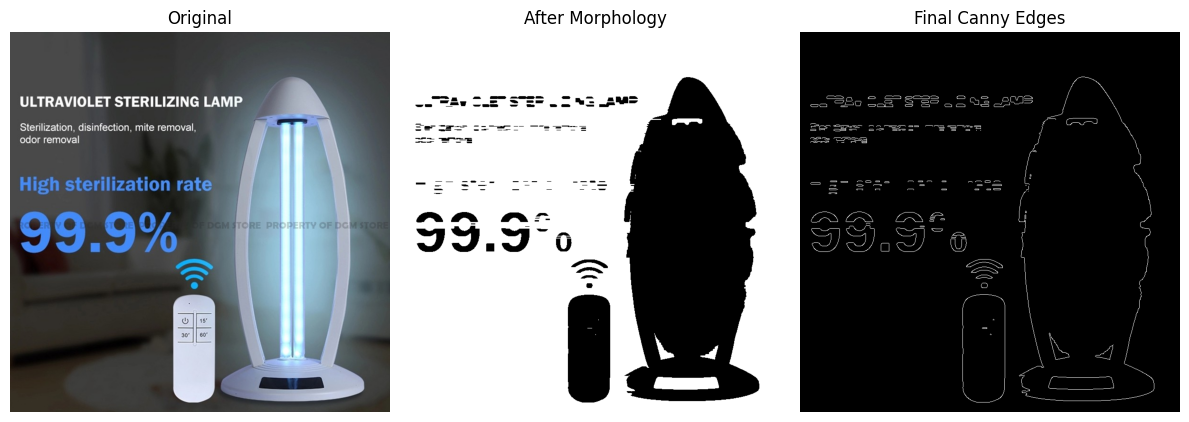

In [ ]:
# EXAMPLE

import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Load Image
img = cv2.imread("dataset/img/light.jpg")
if img is None:
    # Creating a dummy image if file doesn't exist for demonstration
    img = np.zeros((300, 500, 3), dtype="uint8")
    cv2.putText(img, "PIPELINE TEST", (50, 150), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 3)

# 2. Gray & Blur (Noise Reduction)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# 3. Threshold (Otsu's is great for "light.jpg" style unevenness)
# We use BINARY_INV so the object is WHITE and background is BLACK
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# 4. Morphology (The "Secret Weapon")
# We create a 5x1 horizontal kernel to bridge small gaps in lines
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 1))
clean = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

# 5. Edge Detection (On the cleaned binary image)
edges = cv2.Canny(clean, 50, 150)

# --- VISUALIZATION ---

# Plotting with Matplotlib (Remains in Notebook)
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(clean, cmap='gray')
plt.title("After Morphology")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title("Final Canny Edges")
plt.axis('off')

plt.tight_layout()
plt.show()

# Standard OpenCV Window (External)
cv2.imshow("Final Result", edges)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [7]:
"""
1. Sobel Operator (Gradient Calculation)

Before Canny, Sobel finds directional edges.

sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)


Meaning:

(1,0) detects vertical edges

(0,1) detects horizontal edges

Useful when:

You only care about one direction

Line detection problems


2. Laplacian Edge Detection

Detects edges in all directions.

laplacian = cv2.Laplacian(gray, cv2.CV_64F)


This is more sensitive to noise than Canny.

"""



'\n1. Sobel Operator (Gradient Calculation)\n\nBefore Canny, Sobel finds directional edges.\n\nsobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)\nsobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)\n\n\nMeaning:\n\n(1,0) detects vertical edges\n\n(0,1) detects horizontal edges\n\nUseful when:\n\nYou only care about one direction\n\nLine detection problems\n\n\n2. Laplacian Edge Detection\n\nDetects edges in all directions.\n\nlaplacian = cv2.Laplacian(gray, cv2.CV_64F)\n\n\nThis is more sensitive to noise than Canny.\n\n'

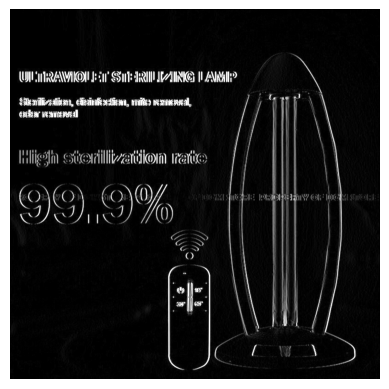

In [ ]:
import cv2
import matplotlib.pyplot as plt

gray = cv2.imread("dataset/img/light.jpg",0)

# Calculate Sobel
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)

# Convert back to unsigned 8-bit to see it correctly
abs_sobelx = cv2.convertScaleAbs(sobelx)

plt.imshow(abs_sobelx, cmap='gray')
plt.axis('off')
plt.show()


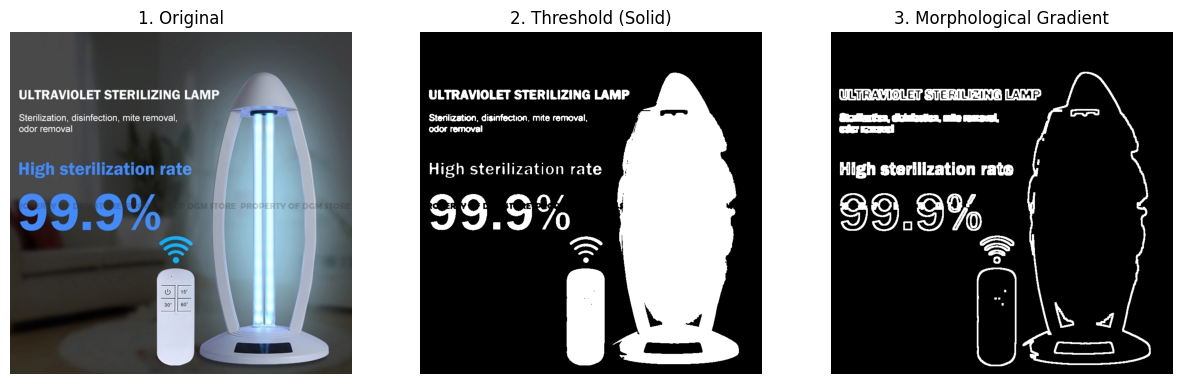

In [ ]:
# Morphological Gradient: simply takes the "expanded" version of an object and subtracts the "shrunken" version. This leaves only the boundary.
# This produces an outline effect.
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Load Image
img = cv2.imread("dataset/img/light.jpg")
if img is None:
    # Fallback dummy for testing
    img = np.zeros((300, 500, 3), dtype="uint8")
    cv2.circle(img, (250, 150), 80, (255, 255, 255), -1)

# 2. Preparation (Gray -> Blur -> Threshold)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# We use BINARY threshold so the object is WHITE
_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 3. The Morphological Gradient
# Larger kernel = Thicker edges
kernel = np.ones((5, 5), np.uint8)
gradient = cv2.morphologyEx(thresh, cv2.MORPH_GRADIENT, kernel)

# --- VISUALIZATION ---

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("1. Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(thresh, cmap='gray')
plt.title("2. Threshold (Solid)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gradient, cmap='gray')
plt.title("3. Morphological Gradient")
plt.axis('off')

plt.show()

# Show result in OpenCV window
cv2.imshow("Morphological Gradient", gradient)
cv2.waitKey(0)
cv2.destroyAllWindows()


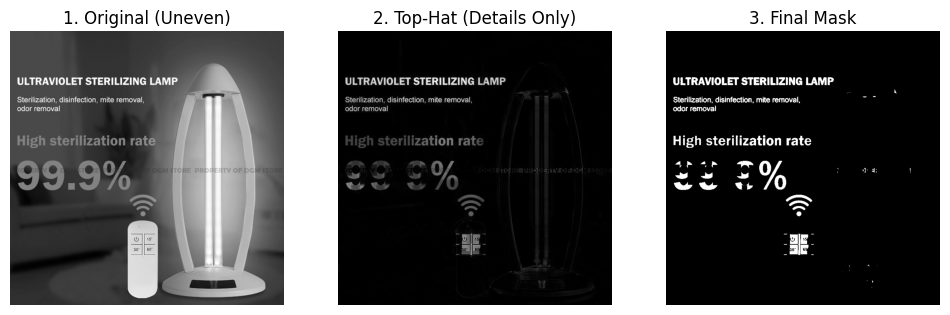

In [ ]:
# Top-Hat = Original Image − Opened Image
# The Logic: "Opening" an image removes everything smaller than the kernel (like tiny bright spots or thin lines). By subtracting that from the original, you are left with only the small things that were removed.
# EX: The paper has shadows (uneven background). Top-Hat removes the shadows and leaves only the crisp, bright (or dark) letters.

import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Load image (best demonstrated on grayscale)
img = cv2.imread("dataset/img/light.jpg", 0) 
if img is None:
    # Dummy: dark background with uneven light and small bright dots
    img = np.zeros((300, 500), dtype="uint8")
    cv2.rectangle(img, (0,0), (500,300), 50, -1) # Dark gray background
    cv2.circle(img, (100, 100), 2, 255, -1)     # Tiny bright dot (target)
    cv2.circle(img, (300, 200), 3, 255, -1)     # Tiny bright dot (target)

# 2. Define a kernel larger than the objects you want to extract
# If your objects are 5px, use a 15x15 kernel
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))

# 3. Apply Top-Hat
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

# 4. Optional: Threshold the result to make it pure Black & White
_, binary_spots = cv2.threshold(tophat, 50, 255, cv2.THRESH_BINARY)

# --- VISUALIZATION ---
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("1. Original (Uneven)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(tophat, cmap='gray')
plt.title("2. Top-Hat (Details Only)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(binary_spots, cmap='gray')
plt.title("3. Final Mask")
plt.axis('off')

plt.show()

# # 5. Advanced Output Comparison Techniques
combined = np.hstack((img, tophat))
cv2.imshow("Comparison", combined)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [2]:
#  Advanced Output Comparison Techniques
# You don’t just show images randomly. They organize comparisons carefully.

import numpy as np
import cv2

img = cv2.imread("dataset/img/light.jpg",0) 

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))

tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

combined = np.hstack((img, tophat))
cv2.imshow("Comparison", combined)

cv2.waitKey(0)
cv2.destroyAllWindows()